In [1]:
import numpy as np 
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('Full Dataset (league standings with players stats).csv')
lgStand = pd.read_csv('League Standings.csv')

In [3]:
lgStand.rename(columns = {'Team':'teamname','Season':'season'}, inplace = True)
lgStand

,Unnamed: 0,season,Standings,teamname,Played,Wins,Draw,Lost,GoalsFor,GoalsAgainst,GoalDifference,Points
0,0,10/11,1,ManchesterUnited,38,23,11,4,78,37,41,80
1,1,10/11,2,Chelsea,38,21,8,9,69,33,36,71
2,2,10/11,3,ManchesterCity,38,21,8,9,60,33,27,71
3,3,10/11,4,Arsenal,38,19,11,8,72,43,29,68
4,4,10/11,5,TottenhamHotspur,38,16,14,8,55,46,9,62
...,...,...,...,...,...,...,...,...,...,...,...,...
215,215,20/21,16,BrightonandHoveAlbion,38,9,14,15,40,46,-6,41
216,216,20/21,17,Burnley,38,10,9,19,33,55,-22,39
217,217,20/21,18,Fulham,38,5,13,20,27,53,-26,28
218,218,20/21,19,WestBromwichAlbion,38,5,11,22,35,76,-41,26


In [4]:
df = df.drop(df.filter(like = 'Unn'), axis = 1)

In [5]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [6]:
#Keep only data for players who have played in the season
df = df[df['minutes']!=0]
df

,id,firstname,lastname,age,nationality,height,weight,injured,teamID,teamname,appearences,lineups,minutes,position,rating,captain,subIn,subOut,bench,totalShots,shotsOn,totalGoals,goalsConceded,goalAssists,goalSaves,totalPasses,keyPasses,passAccuracy,totalTackles,blocks,interceptions,duelsTotal,duelsWon,dribbleAttempts,dribblesSuccess,dribblesPast,foulsDrawn,foulsCommitted,cardsYel,cardsYelRed,cardsRed,penaltyWon,penaltyCommited,penaltyScored,penaltyMissed,penaltySaved,season,name,Standings,Played,Wins,Draw,Lost,GoalsFor,GoalsAgainst,GoalDifference,Points
1,19153,Gareth,Barry,39.0,England,183 cm,78 kg,False,66,AstonVilla,1.0,1.0,90.0,Midfielder,NaN,False,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19203,Ashley,Cole,41.0,England,176 cm,66 kg,False,42,Arsenal,2.0,2.0,180.0,Defender,NaN,False,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50978,Justin,Hoyte,36.0,Trinidad and Tobago,180 cm,68 kg,False,42,Arsenal,1.0,0.0,1.0,Defender,NaN,False,1.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,77110,Thomas,Løvendahl Sørensen,45.0,Denmark,196 cm,89 kg,False,746,Sunderland,1.0,1.0,90.0,Goalkeeper,NaN,False,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,83026,Peter,Whittingham,34.0,England,178 cm,63 kg,False,66,AstonVilla,2.0,1.0,123.0,Midfielder,NaN,False,1.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10761,50828,Zack,Steffen,27.0,USA,191 cm,86 kg,False,50,ManchesterCity,1.0,1.0,90.0,Goalkeeper,6.300000,False,0.0,0.0,34.0,NaN,NaN,0.0,1.0,NaN,1.0,26.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0,20/21,Kevin De Bruyne (2),1.0,38.0,27.0,5.0,6.0,83.0,32.0,51.0,86.0
10764,17,Christian,Pulisic,24.0,USA,172 cm,69 kg,False,49,Chelsea,27.0,18.0,1735.0,Midfielder,6.842307,False,9.0,6.0,11.0,32.0,16.0,4.0,0.0,2.0,NaN,662.0,26.0,20.0,19.0,2.0,12.0,276.0,120.0,108.0,49.0,NaN,33.0,13.0,2.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,20/21,Kevin De Bruyne (2),4.0,38.0,19.0,10.0,9.0,58.0,36.0,22.0,67.0
10766,2294,Willian,Borges da Silva,34.0,Brazil,175 cm,77 kg,False,42,Arsenal,25.0,16.0,1406.0,Attacker,7.004000,False,9.0,10.0,17.0,13.0,3.0,1.0,0.0,5.0,NaN,677.0,32.0,23.0,13.0,NaN,8.0,106.0,56.0,18.0,13.0,NaN,21.0,5.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,20/21,Kevin De Bruyne (2),8.0,38.0,18.0,7.0,13.0,55.0,39.0,16.0,61.0
10767,18897,DeAndre Roselle,Yedlin,29.0,USA,172 cm,75 kg,False,34,NewcastleUnited,6.0,5.0,437.0,Defender,6.516666,False,1.0,2.0,4.0,1.0,NaN,0.0,0.0,NaN,NaN,135.0,3.0,17.0,9.0,1.0,7.0,31.0,18.0,2.0,1.0,NaN,4.0,4.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,20/21,Kevin De Bruyne (2),12.0,38.0,12.0,9.0,17.0,46.0,62.0,-16.0,45.0


In [7]:
sumOfMetrics = df.groupby(df['season']).sum().reset_index()
avOfPassAcc = df.groupby(df['season']).mean().reset_index()

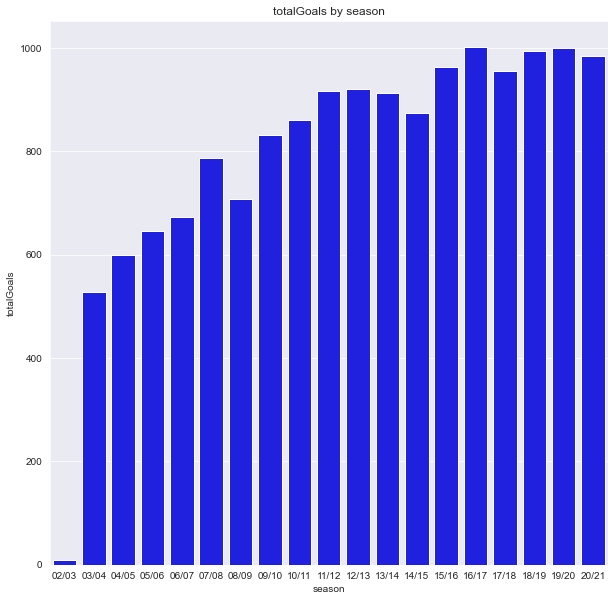

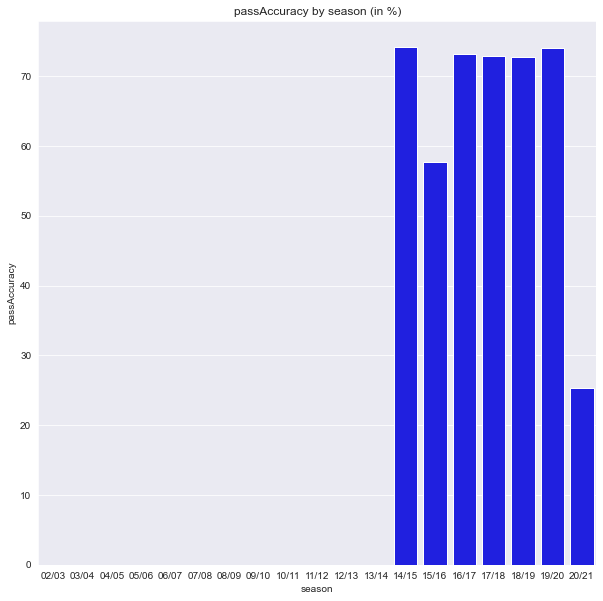

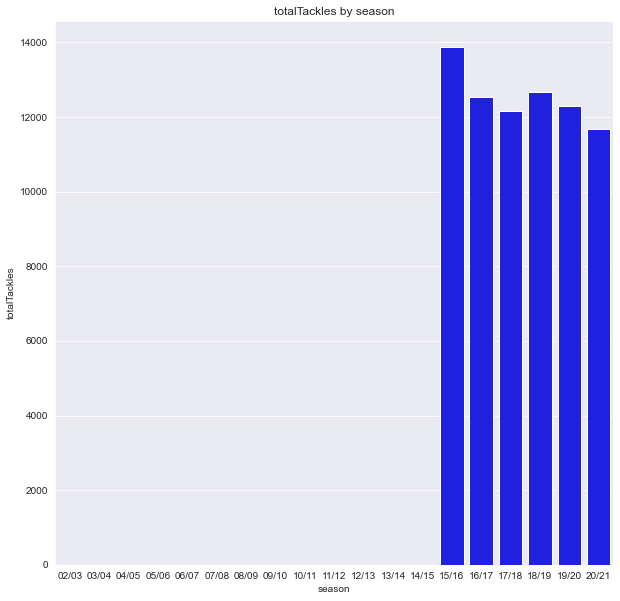

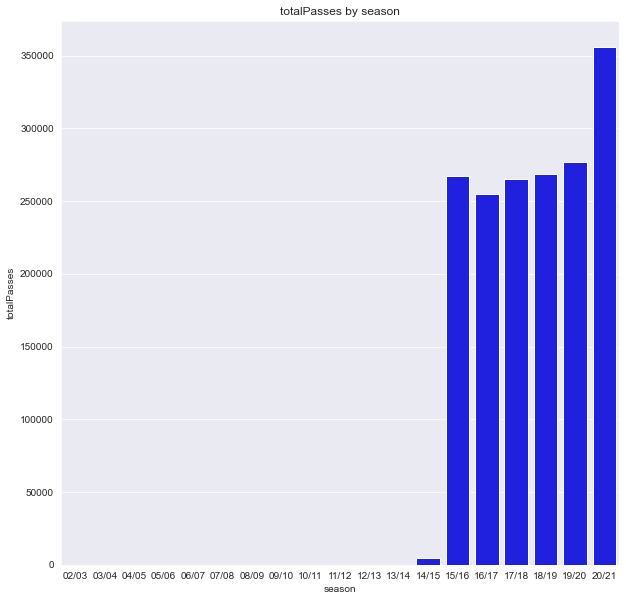

In [8]:
#General statistics throughout seasons
cols = ['totalGoals','passAccuracy','totalTackles','totalPasses']
sns.set_style('darkgrid')
sns.set_palette('Set2')
#ns.set_context("paper", rc={"axes.labelsize":25})
for col in cols: 
    if col == 'passAccuracy': 
        fig, ax = plt.subplots(figsize=(10, 10))    
        sns.barplot(data=avOfPassAcc, \
                    x=avOfPassAcc['season'],\
                    y=avOfPassAcc[col],\
                    color = 'blue',\
                    ax = ax).set_title(str(col) + ' by season (in %)')
    else: 
        fig, ax = plt.subplots(figsize=(10, 10))    
        sns.barplot(data=sumOfMetrics, \
                    x=sumOfMetrics['season'],\
                    y=sumOfMetrics[col],\
                    color = 'blue',\
                    ax = ax).set_title(str(col) + ' by season')

In [9]:
#Plot relationship between league position and number of goals
#Have to group by season and team
totalGoalSznTeam = df.groupby(['teamname','season']).sum().reset_index()
totalGoalSznTeam = totalGoalSznTeam.filter(['teamname', 'season'])

In [10]:
merged = totalGoalSznTeam.merge(lgStand, how = 'left', on = ['season','teamname'])
merged

,teamname,season,Unnamed: 0,Standings,Played,Wins,Draw,Lost,GoalsFor,GoalsAgainst,GoalDifference,Points
0,Arsenal,02/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arsenal,03/04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arsenal,04/05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arsenal,05/06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arsenal,06/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
376,WolverhamptonWanderers,10/11,16.0,17.0,38.0,11.0,7.0,20.0,46.0,66.0,-20.0,40.0
377,WolverhamptonWanderers,11/12,39.0,20.0,38.0,5.0,10.0,23.0,40.0,82.0,-42.0,25.0
378,WolverhamptonWanderers,18/19,166.0,7.0,38.0,16.0,9.0,13.0,47.0,46.0,1.0,57.0
379,WolverhamptonWanderers,19/20,186.0,7.0,38.0,15.0,14.0,9.0,51.0,40.0,11.0,59.0


In [11]:
to_merge = df.groupby(['season','teamname']).sum().reset_index()

In [12]:
forLinearReg = merged.merge(to_merge,how = 'left', on = ['season','teamname'])

In [13]:
forLinearReg = forLinearReg.drop(forLinearReg.filter(like = 'Unn'), axis = 1)

In [14]:
forLinearReg.dropna(inplace=True)

In [15]:
#Remove the data that is 0. We don't need data from 13/14 until the most recent data.
forLinearReg['to_remove'] = forLinearReg['season'].str[:2]
forLinearReg['to_remove'] = forLinearReg['to_remove'].astype(int)
forLinearRegMod = forLinearReg[forLinearReg['to_remove'] > 14]

In [16]:
to_generate = forLinearRegMod.columns
to_generate = to_generate[24:50]

In [17]:
#let's get some metrics aswell
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packag

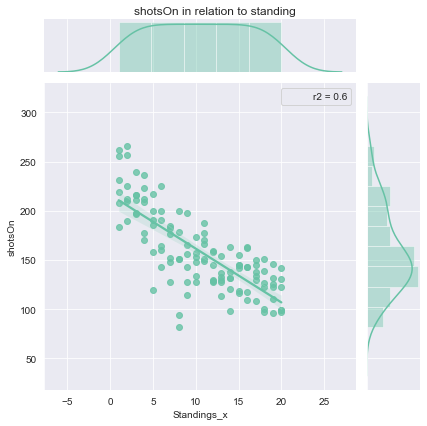

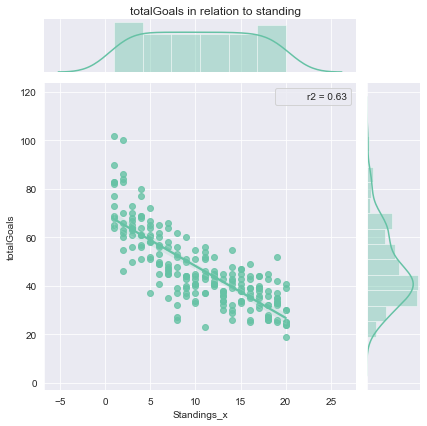

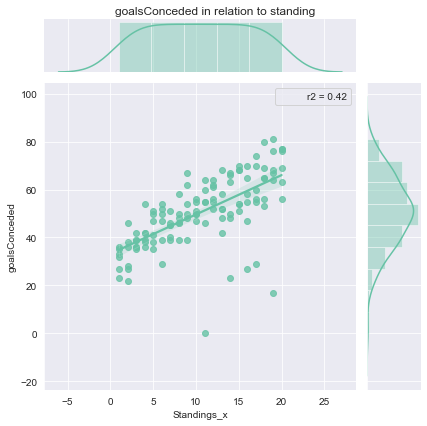

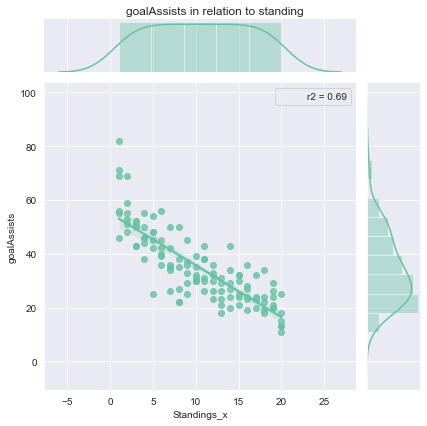

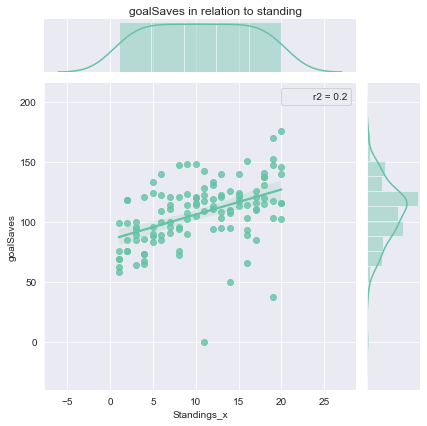

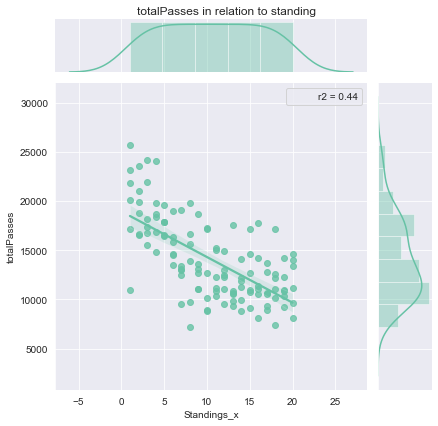

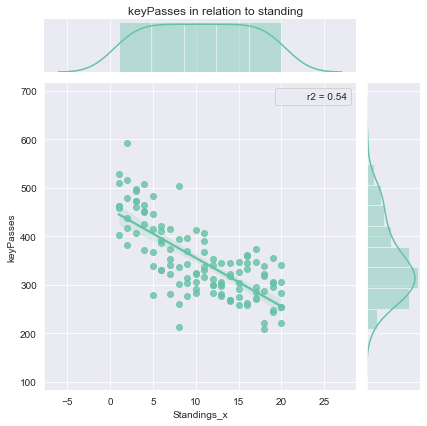

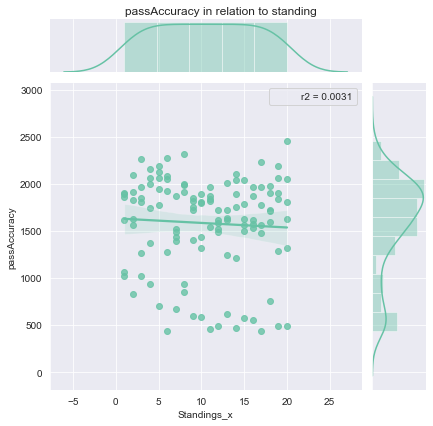

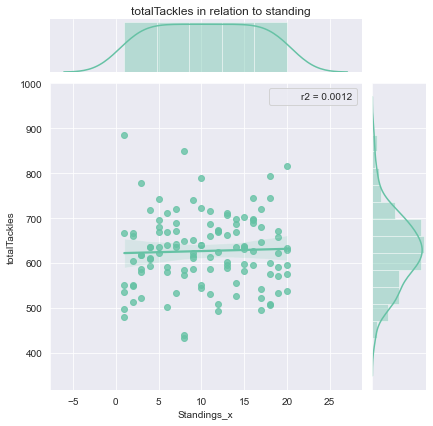

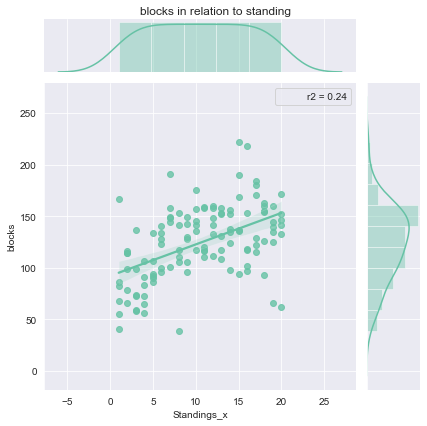

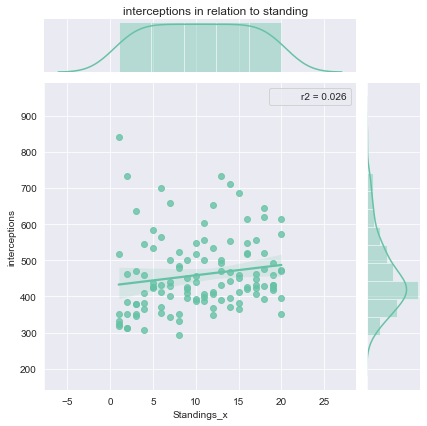

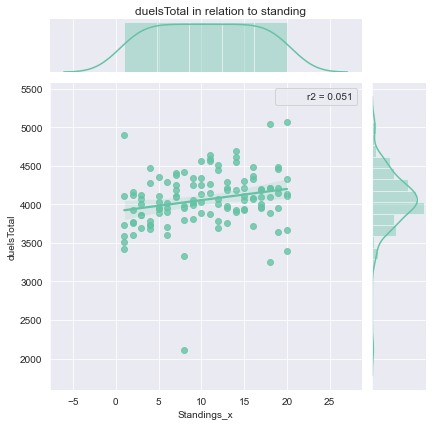

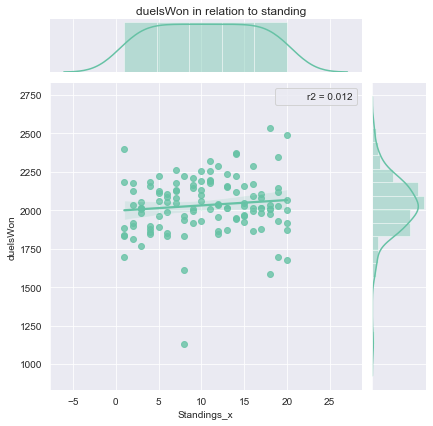

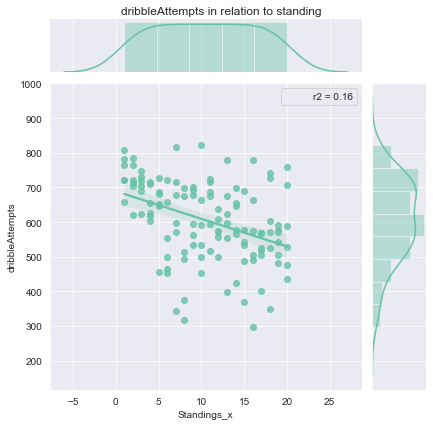

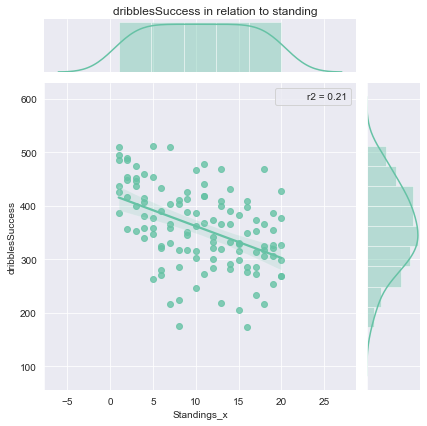

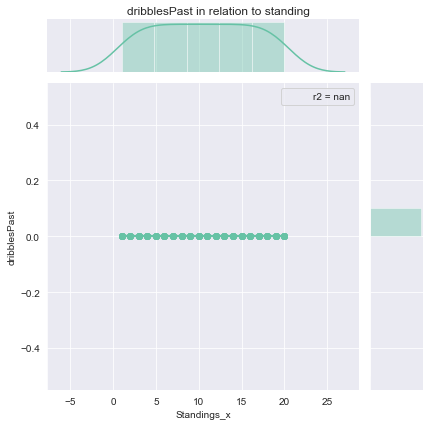

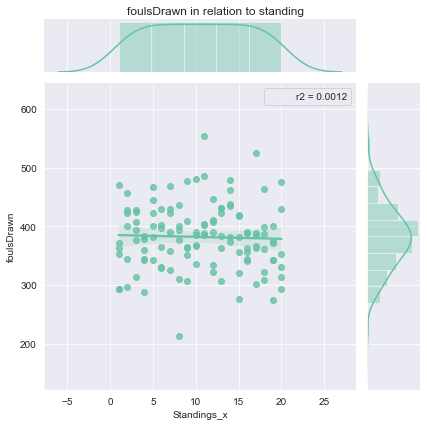

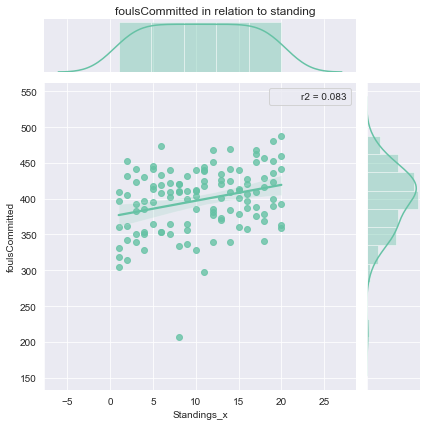

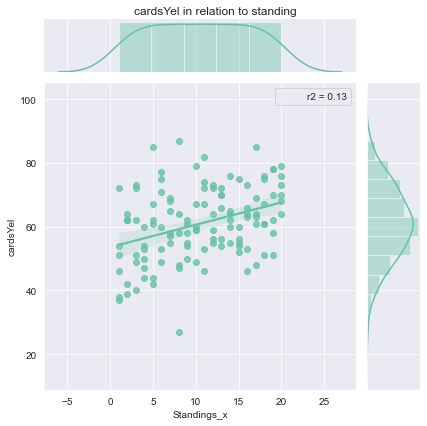

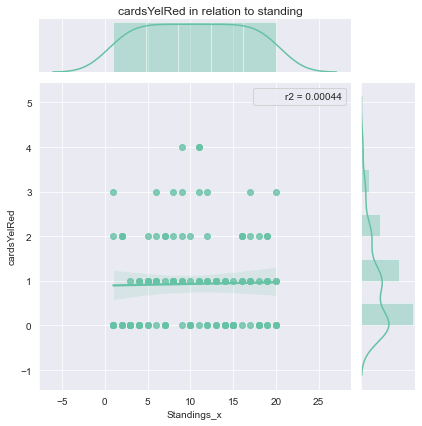

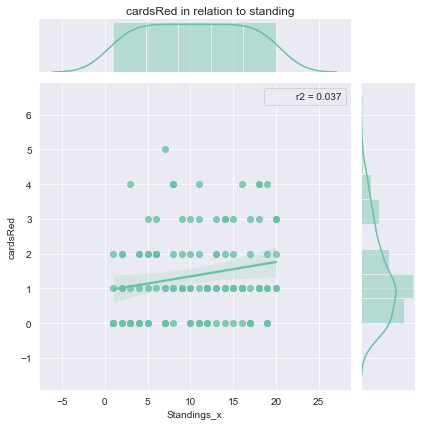

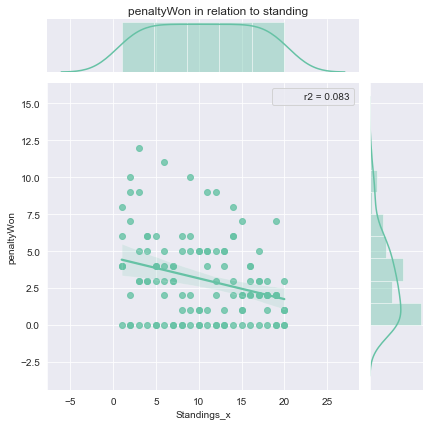

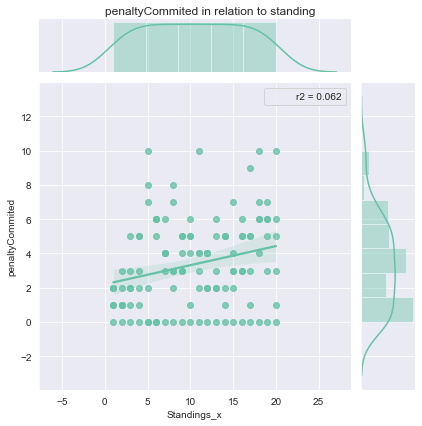

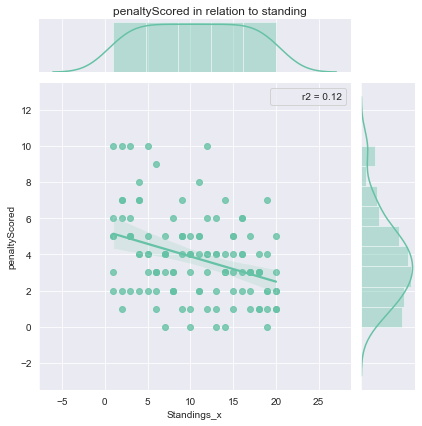

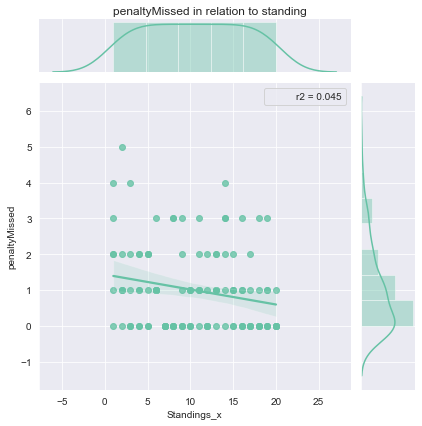

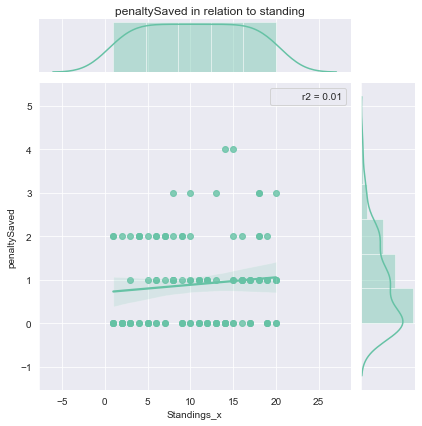

In [18]:
#Plot lin reg 
for col in to_generate:
    if col == 'totalGoals': 
        sns.jointplot(data=forLinearReg, x='Standings_x', y='totalGoals',kind="reg",stat_func=r2)
        plt.suptitle('totalGoals in relation to standing')
        plt.subplots_adjust(top=0.95)
    else: 
        sns.jointplot(data=forLinearRegMod, x='Standings_x', y=col,kind="reg",stat_func=r2)
        plt.suptitle(str(col)+ ' in relation to standing')
        plt.subplots_adjust(top=0.95)

#Intuitively enough, there seems to be a linear relationship with the final position with, the number of goals scored,
#the number of assists, key passes, total passes, shots on target. These attributes have the strongest relationship
#with the position. I expected a better relationship with duelsWon, interceptions, passAccuracy. 

#The r2 scores are not too strong but can still demonstrate some relationship between the variables

In [19]:
df

,id,firstname,lastname,age,nationality,height,weight,injured,teamID,teamname,appearences,lineups,minutes,position,rating,captain,subIn,subOut,bench,totalShots,shotsOn,totalGoals,goalsConceded,goalAssists,goalSaves,totalPasses,keyPasses,passAccuracy,totalTackles,blocks,interceptions,duelsTotal,duelsWon,dribbleAttempts,dribblesSuccess,dribblesPast,foulsDrawn,foulsCommitted,cardsYel,cardsYelRed,cardsRed,penaltyWon,penaltyCommited,penaltyScored,penaltyMissed,penaltySaved,season,name,Standings,Played,Wins,Draw,Lost,GoalsFor,GoalsAgainst,GoalDifference,Points
1,19153,Gareth,Barry,39.0,England,183 cm,78 kg,False,66,AstonVilla,1.0,1.0,90.0,Midfielder,NaN,False,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19203,Ashley,Cole,41.0,England,176 cm,66 kg,False,42,Arsenal,2.0,2.0,180.0,Defender,NaN,False,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50978,Justin,Hoyte,36.0,Trinidad and Tobago,180 cm,68 kg,False,42,Arsenal,1.0,0.0,1.0,Defender,NaN,False,1.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,77110,Thomas,Løvendahl Sørensen,45.0,Denmark,196 cm,89 kg,False,746,Sunderland,1.0,1.0,90.0,Goalkeeper,NaN,False,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,83026,Peter,Whittingham,34.0,England,178 cm,63 kg,False,66,AstonVilla,2.0,1.0,123.0,Midfielder,NaN,False,1.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10761,50828,Zack,Steffen,27.0,USA,191 cm,86 kg,False,50,ManchesterCity,1.0,1.0,90.0,Goalkeeper,6.300000,False,0.0,0.0,34.0,NaN,NaN,0.0,1.0,NaN,1.0,26.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0,20/21,Kevin De Bruyne (2),1.0,38.0,27.0,5.0,6.0,83.0,32.0,51.0,86.0
10764,17,Christian,Pulisic,24.0,USA,172 cm,69 kg,False,49,Chelsea,27.0,18.0,1735.0,Midfielder,6.842307,False,9.0,6.0,11.0,32.0,16.0,4.0,0.0,2.0,NaN,662.0,26.0,20.0,19.0,2.0,12.0,276.0,120.0,108.0,49.0,NaN,33.0,13.0,2.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,20/21,Kevin De Bruyne (2),4.0,38.0,19.0,10.0,9.0,58.0,36.0,22.0,67.0
10766,2294,Willian,Borges da Silva,34.0,Brazil,175 cm,77 kg,False,42,Arsenal,25.0,16.0,1406.0,Attacker,7.004000,False,9.0,10.0,17.0,13.0,3.0,1.0,0.0,5.0,NaN,677.0,32.0,23.0,13.0,NaN,8.0,106.0,56.0,18.0,13.0,NaN,21.0,5.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,20/21,Kevin De Bruyne (2),8.0,38.0,18.0,7.0,13.0,55.0,39.0,16.0,61.0
10767,18897,DeAndre Roselle,Yedlin,29.0,USA,172 cm,75 kg,False,34,NewcastleUnited,6.0,5.0,437.0,Defender,6.516666,False,1.0,2.0,4.0,1.0,NaN,0.0,0.0,NaN,NaN,135.0,3.0,17.0,9.0,1.0,7.0,31.0,18.0,2.0,1.0,NaN,4.0,4.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,20/21,Kevin De Bruyne (2),12.0,38.0,12.0,9.0,17.0,46.0,62.0,-16.0,45.0


In [20]:
#Check all-time goalscorers 
topGoalScorers = df.groupby(['firstname','lastname']).sum()
topGoalScorers.sort_values(['totalGoals'], ascending=False).head(10)

,,id,age,injured,teamID,appearences,lineups,minutes,rating,captain,subIn,subOut,bench,totalShots,shotsOn,totalGoals,goalsConceded,goalAssists,goalSaves,totalPasses,keyPasses,passAccuracy,totalTackles,blocks,interceptions,duelsTotal,duelsWon,dribbleAttempts,dribblesSuccess,dribblesPast,foulsDrawn,foulsCommitted,cardsYel,cardsYelRed,cardsRed,penaltyWon,penaltyCommited,penaltyScored,penaltyMissed,penaltySaved,Standings,Played,Wins,Draw,Lost,GoalsFor,GoalsAgainst,GoalDifference,Points
firstname,lastname,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Sergio Leonel,Agüero del Castillo,6420,330.0,False,500,275.0,235.0,19867.0,51.556979,False,40.0,131.0,59.0,565.0,235.0,184.0,0.0,24.0,0.0,2976.0,164.0,498.0,70.0,5.0,30.0,1290.0,530.0,469.0,281.0,0.0,128.0,87.0,23.0,0.0,1.0,4.0,0.0,17.0,4.0,0.0,18.0,380.0,261.0,58.0,61.0,881.0,335.0,546.0,841.0
Harry,Kane,1656,261.0,False,447,244.0,228.0,20306.0,44.716314,False,16.0,55.0,27.0,731.0,344.0,166.0,0.0,30.0,0.0,3352.0,229.0,349.0,117.0,37.0,48.0,2451.0,1032.0,505.0,253.0,0.0,296.0,193.0,27.0,0.0,0.0,5.0,0.0,22.0,2.0,0.0,47.0,342.0,175.0,77.0,90.0,579.0,390.0,189.0,602.0
Robin,van Persie,408782,396.0,False,435,278.0,227.0,20071.0,0.000000,False,51.0,75.0,69.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19.0,190.0,107.0,40.0,43.0,358.0,215.0,143.0,361.0
Jermain Colin,Defoe,29886,680.0,False,4181,385.0,285.0,26278.0,27.105650,False,100.0,90.0,143.0,205.0,86.0,133.0,0.0,4.0,0.0,819.0,55.0,205.0,49.0,2.0,9.0,467.0,180.0,97.0,48.0,0.0,71.0,53.0,30.0,0.0,2.0,2.0,0.0,6.0,0.0,0.0,99.0,342.0,124.0,90.0,128.0,451.0,499.0,-48.0,462.0
Jamie,Vardy,131516,245.0,False,322,245.0,227.0,20066.0,42.704888,False,18.0,60.0,18.0,463.0,235.0,118.0,0.0,30.0,0.0,2122.0,203.0,310.0,112.0,14.0,40.0,2023.0,818.0,311.0,140.0,0.0,139.0,162.0,22.0,1.0,2.0,10.0,0.0,26.0,5.0,0.0,55.0,266.0,111.0,60.0,95.0,404.0,353.0,51.0,393.0
Romelu,Lukaku Menama,7256,232.0,False,355,250.0,209.0,19042.0,28.609195,False,41.0,50.0,50.0,357.0,178.0,113.0,0.0,19.0,0.0,2368.0,157.0,248.0,37.0,10.0,5.0,1734.0,704.0,269.0,160.0,0.0,78.0,112.0,19.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,56.0,304.0,137.0,76.0,91.0,481.0,373.0,108.0,487.0
Didier Yves,Drogba Tébily,924579,360.0,False,441,253.0,187.0,17496.0,0.000000,False,66.0,59.0,75.0,0.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,114.0,65.0,27.0,22.0,207.0,111.0,96.0,222.0
Peter,Crouch,302848,640.0,False,2245,444.0,295.0,27210.0,34.014019,False,149.0,102.0,221.0,75.0,30.0,104.0,0.0,5.0,0.0,777.0,42.0,254.0,10.0,8.0,8.0,958.0,547.0,22.0,14.0,0.0,33.0,83.0,35.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,106.0,342.0,107.0,100.0,135.0,380.0,488.0,-108.0,421.0
Darren,Bent,820110,370.0,False,3810,251.0,194.0,18023.0,0.000000,False,57.0,40.0,75.0,0.0,0.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,190.0,48.0,53.0,89.0,203.0,323.0,-120.0,197.0


In [ ]:
#Calculate proportion of goals contributed
#Check if player of the yearis consistently in the team that won the league